In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")
data.sample(2)

The dataset currently contains 74511 records, here is a sample:


,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index
58354,2020-08-30,GN,3.0,2.0,2.0,3.0,0.0,2.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,68.06
24792,2020-04-12,US_NM,3.0,3.0,2.0,4.0,2.0,1.0,2.0,3.0,2.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,87.04


choose specific policies (closure and health)

In [52]:
data_closure = data[['date','key','school_closing', 'workplace_closing', 'cancel_public_events','restrictions_on_gatherings','public_transport_closing','stay_at_home_requirements','restrictions_on_internal_movement','international_travel_controls']]
data_health = data[['date','key', 'testing_policy', 'contact_tracing','emergency_investment_in_healthcare','investment_in_vaccines']] 

pick: Green(Australia), Yellow(China),Red(US)

Australia

Closure Policy Data of AU

In [60]:
data_closure_AU = data_closure[data_closure['key'] == "AU"]

In [61]:
s1 = (data_closure_AU['school_closing'] - data_closure_AU['school_closing'].min())/(data_closure_AU['school_closing'].max() - data_closure_AU['school_closing'].min())
data_closure_AU = data_closure_AU.drop(['school_closing'],axis=1)
data_closure_AU.insert(2,'school_closing',s1)
s2 = (data_closure_AU['workplace_closing'] - data_closure_AU['workplace_closing'].min())/(data_closure_AU['workplace_closing'].max() - data_closure_AU['workplace_closing'].min())
data_closure_AU = data_closure_AU.drop(['workplace_closing'],axis=1)
data_closure_AU.insert(3,'workplace_closing',s2)
s3 = (data_closure_AU['cancel_public_events'] - data_closure_AU['cancel_public_events'].min())/(data_closure_AU['cancel_public_events'].max() - data_closure_AU['cancel_public_events'].min())
data_closure_AU = data_closure_AU.drop(['cancel_public_events'],axis=1)
data_closure_AU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AU['restrictions_on_gatherings'] - data_closure_AU['restrictions_on_gatherings'].min())/(data_closure_AU['restrictions_on_gatherings'].max() - data_closure_AU['restrictions_on_gatherings'].min())
data_closure_AU = data_closure_AU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AU['public_transport_closing'] - data_closure_AU['public_transport_closing'].min())/(data_closure_AU['public_transport_closing'].max() - data_closure_AU['public_transport_closing'].min())
data_closure_AU = data_closure_AU.drop(['public_transport_closing'],axis=1)
data_closure_AU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AU['stay_at_home_requirements'] - data_closure_AU['stay_at_home_requirements'].min())/(data_closure_AU['stay_at_home_requirements'].max() - data_closure_AU['stay_at_home_requirements'].min())
data_closure_AU = data_closure_AU.drop(['stay_at_home_requirements'],axis=1)
data_closure_AU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AU['restrictions_on_internal_movement'] - data_closure_AU['restrictions_on_internal_movement'].min())/(data_closure_AU['restrictions_on_internal_movement'].max() - data_closure_AU['restrictions_on_internal_movement'].min())
data_closure_AU = data_closure_AU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AU['international_travel_controls'] - data_closure_AU['international_travel_controls'].min())/(data_closure_AU['international_travel_controls'].max() - data_closure_AU['international_travel_controls'].min())
data_closure_AU = data_closure_AU.drop(['international_travel_controls'],axis=1)
data_closure_AU.insert(9,'international_travel_controls',s8)

data_closure_AU

,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls
8,2020-01-01,AU,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
249,2020-01-02,AU,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
490,2020-01-03,AU,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
731,2020-01-04,AU,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
972,2020-01-05,AU,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
72786,2020-10-31,AU,0.333333,0.333333,0.5,0.75,1.0,0.333333,1.0,0.75
72988,2020-11-01,AU,0.333333,0.333333,0.5,0.75,1.0,0.333333,1.0,0.75
73188,2020-11-02,AU,0.333333,0.333333,0.5,0.75,1.0,0.333333,1.0,0.75
73379,2020-11-03,AU,0.333333,0.333333,0.5,0.75,1.0,0.333333,1.0,0.75


In [62]:
AU_closure_average_ontime = data_closure_AU.mean(axis = 0) 
AU_closure_average_ontime

school_closing                       0.564186
workplace_closing                    0.491909
cancel_public_events                 0.710356
restrictions_on_gatherings           0.703883
public_transport_closing             0.553398
stay_at_home_requirements            0.419633
restrictions_on_internal_movement    0.747573
international_travel_controls        0.844660
dtype: float64

In [65]:
AU_closure_average = AU_closure_average_ontime.mean()
AU_closure_average

0.6294498381877023

Health Policy Data of AU

In [128]:
data_health_AU = data_health[data_health['key'] == "AU"]

s1 = (data_health_AU['testing_policy'] - data_health_AU['testing_policy'].min())/(data_health_AU['testing_policy'].max() - data_health_AU['testing_policy'].min())
data_health_AU = data_health_AU.drop(['testing_policy'],axis=1)
data_health_AU.insert(2,'testing_policy',s1)
s2 = (data_health_AU['contact_tracing'] - data_health_AU['contact_tracing'].min())/(data_health_AU['contact_tracing'].max() - data_health_AU['contact_tracing'].min())
data_health_AU = data_health_AU.drop(['contact_tracing'],axis=1)
data_health_AU.insert(3,'contact_tracing',s2)
s3 = (data_health_AU['emergency_investment_in_healthcare'] - data_health_AU['emergency_investment_in_healthcare'].min())/(data_health_AU['emergency_investment_in_healthcare'].max() - data_health_AU['emergency_investment_in_healthcare'].min())
data_health_AU = data_health_AU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AU['investment_in_vaccines'] - data_health_AU['investment_in_vaccines'].min())/(data_health_AU['investment_in_vaccines'].max() - data_health_AU['investment_in_vaccines'].min())
data_health_AU = data_health_AU.drop(['investment_in_vaccines'],axis=1)
data_health_AU.insert(5,'investment_in_vaccines',s4)

AU_health_average_ontime = data_health_AU.mean(axis = 0) 
AU_health_average = AU_health_average_ontime.mean()
AU_health_average

0.4127818672163291

China

In [64]:
data_closure_CN = data_closure[data_closure['key'] == "CN"]

s1 = (data_closure_CN['school_closing'] - data_closure_CN['school_closing'].min())/(data_closure_CN['school_closing'].max() - data_closure_CN['school_closing'].min())
data_closure_CN = data_closure_CN.drop(['school_closing'],axis=1)
data_closure_CN.insert(2,'school_closing',s1)
s2 = (data_closure_CN['workplace_closing'] - data_closure_CN['workplace_closing'].min())/(data_closure_CN['workplace_closing'].max() - data_closure_CN['workplace_closing'].min())
data_closure_CN = data_closure_CN.drop(['workplace_closing'],axis=1)
data_closure_CN.insert(3,'workplace_closing',s2)
s3 = (data_closure_CN['cancel_public_events'] - data_closure_CN['cancel_public_events'].min())/(data_closure_CN['cancel_public_events'].max() - data_closure_CN['cancel_public_events'].min())
data_closure_CN = data_closure_CN.drop(['cancel_public_events'],axis=1)
data_closure_CN.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CN['restrictions_on_gatherings'] - data_closure_CN['restrictions_on_gatherings'].min())/(data_closure_CN['restrictions_on_gatherings'].max() - data_closure_CN['restrictions_on_gatherings'].min())
data_closure_CN = data_closure_CN.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CN.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CN['public_transport_closing'] - data_closure_CN['public_transport_closing'].min())/(data_closure_CN['public_transport_closing'].max() - data_closure_CN['public_transport_closing'].min())
data_closure_CN = data_closure_CN.drop(['public_transport_closing'],axis=1)
data_closure_CN.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CN['stay_at_home_requirements'] - data_closure_CN['stay_at_home_requirements'].min())/(data_closure_CN['stay_at_home_requirements'].max() - data_closure_CN['stay_at_home_requirements'].min())
data_closure_CN = data_closure_CN.drop(['stay_at_home_requirements'],axis=1)
data_closure_CN.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CN['restrictions_on_internal_movement'] - data_closure_CN['restrictions_on_internal_movement'].min())/(data_closure_CN['restrictions_on_internal_movement'].max() - data_closure_CN['restrictions_on_internal_movement'].min())
data_closure_CN = data_closure_CN.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CN.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CN['international_travel_controls'] - data_closure_CN['international_travel_controls'].min())/(data_closure_CN['international_travel_controls'].max() - data_closure_CN['international_travel_controls'].min())
data_closure_CN = data_closure_CN.drop(['international_travel_controls'],axis=1)
data_closure_CN.insert(9,'international_travel_controls',s8)

CN_closure_average_ontime = data_closure_CN.mean(axis = 0) 

CN_closure_average = CN_closure_average_ontime.mean()
CN_closure_average

0.8193413091309131

In [72]:
data_health_CN = data_health[data_health['key'] == "CN"]

s1 = (data_health_CN['testing_policy'] - data_health_CN['testing_policy'].min())/(data_health_CN['testing_policy'].max() - data_health_CN['testing_policy'].min())
data_health_CN = data_health_CN.drop(['testing_policy'],axis=1)
data_health_CN.insert(2,'testing_policy',s1)
s2 = (data_health_CN['contact_tracing'] - data_health_CN['contact_tracing'].min())/(data_health_CN['contact_tracing'].max() - data_health_CN['contact_tracing'].min())
data_health_CN = data_health_CN.drop(['contact_tracing'],axis=1)
data_health_CN.insert(3,'contact_tracing',s2)
s3 = (data_health_CN['emergency_investment_in_healthcare'] - data_health_CN['emergency_investment_in_healthcare'].min())/(data_health_CN['emergency_investment_in_healthcare'].max() - data_health_CN['emergency_investment_in_healthcare'].min())
data_health_CN = data_health_CN.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CN.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CN['investment_in_vaccines'] - data_health_CN['investment_in_vaccines'].min())/(data_health_CN['investment_in_vaccines'].max() - data_health_CN['investment_in_vaccines'].min())
data_health_CN = data_health_CN.drop(['investment_in_vaccines'],axis=1)
data_health_CN.insert(5,'investment_in_vaccines',s4)

CN_health_average_ontime = data_health_CN.mean(axis = 0) 
CN_health_average = CN_health_average_ontime.mean()
CN_health_average

0.5890718263450375

United States

In [66]:
data_closure_US = data_closure[data_closure['key'] == "US"]

s1 = (data_closure_US['school_closing'] - data_closure_US['school_closing'].min())/(data_closure_US['school_closing'].max() - data_closure_US['school_closing'].min())
data_closure_US = data_closure_US.drop(['school_closing'],axis=1)
data_closure_US.insert(2,'school_closing',s1)
s2 = (data_closure_US['workplace_closing'] - data_closure_US['workplace_closing'].min())/(data_closure_US['workplace_closing'].max() - data_closure_US['workplace_closing'].min())
data_closure_US = data_closure_US.drop(['workplace_closing'],axis=1)
data_closure_US.insert(3,'workplace_closing',s2)
s3 = (data_closure_US['cancel_public_events'] - data_closure_US['cancel_public_events'].min())/(data_closure_US['cancel_public_events'].max() - data_closure_US['cancel_public_events'].min())
data_closure_US = data_closure_US.drop(['cancel_public_events'],axis=1)
data_closure_US.insert(4,'cancel_public_events',s3)
s4 = (data_closure_US['restrictions_on_gatherings'] - data_closure_US['restrictions_on_gatherings'].min())/(data_closure_US['restrictions_on_gatherings'].max() - data_closure_US['restrictions_on_gatherings'].min())
data_closure_US = data_closure_US.drop(['restrictions_on_gatherings'],axis=1)
data_closure_US.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_US['public_transport_closing'] - data_closure_US['public_transport_closing'].min())/(data_closure_US['public_transport_closing'].max() - data_closure_US['public_transport_closing'].min())
data_closure_US = data_closure_US.drop(['public_transport_closing'],axis=1)
data_closure_US.insert(6,'public_transport_closing',s5)
s6 = (data_closure_US['stay_at_home_requirements'] - data_closure_US['stay_at_home_requirements'].min())/(data_closure_US['stay_at_home_requirements'].max() - data_closure_US['stay_at_home_requirements'].min())
data_closure_US = data_closure_US.drop(['stay_at_home_requirements'],axis=1)
data_closure_US.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_US['restrictions_on_internal_movement'] - data_closure_US['restrictions_on_internal_movement'].min())/(data_closure_US['restrictions_on_internal_movement'].max() - data_closure_US['restrictions_on_internal_movement'].min())
data_closure_US = data_closure_US.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_US.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_US['international_travel_controls'] - data_closure_US['international_travel_controls'].min())/(data_closure_US['international_travel_controls'].max() - data_closure_US['international_travel_controls'].min())
data_closure_US = data_closure_US.drop(['international_travel_controls'],axis=1)
data_closure_US.insert(9,'international_travel_controls',s8)

US_closure_average_ontime = data_closure_US.mean(axis = 0) 

US_closure_average = US_closure_average_ontime.mean()
US_closure_average

0.735256922257721

In [73]:
data_health_US = data_health[data_health['key'] == "US"]

s1 = (data_health_US['testing_policy'] - data_health_US['testing_policy'].min())/(data_health_US['testing_policy'].max() - data_health_US['testing_policy'].min())
data_health_US = data_health_US.drop(['testing_policy'],axis=1)
data_health_US.insert(2,'testing_policy',s1)
s2 = (data_health_US['contact_tracing'] - data_health_US['contact_tracing'].min())/(data_health_US['contact_tracing'].max() - data_health_US['contact_tracing'].min())
data_health_US = data_health_US.drop(['contact_tracing'],axis=1)
data_health_US.insert(3,'contact_tracing',s2)
s3 = (data_health_US['emergency_investment_in_healthcare'] - data_health_US['emergency_investment_in_healthcare'].min())/(data_health_US['emergency_investment_in_healthcare'].max() - data_health_US['emergency_investment_in_healthcare'].min())
data_health_US = data_health_US.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_US.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_US['investment_in_vaccines'] - data_health_US['investment_in_vaccines'].min())/(data_health_US['investment_in_vaccines'].max() - data_health_US['investment_in_vaccines'].min())
data_health_US = data_health_US.drop(['investment_in_vaccines'],axis=1)
data_health_US.insert(5,'investment_in_vaccines',s4)

US_health_average_ontime = data_health_US.mean(axis = 0) 
US_health_average = US_health_average_ontime.mean()
US_health_average

0.43674559487046744

Plot results

In [76]:
print(AU_closure_average)
print(AU_health_average)
print(CN_closure_average)
print(CN_health_average)
print(US_closure_average)
print(US_health_average)

0.6294498381877023
0.4127818672163291
0.8193413091309131
0.5890718263450375
0.735256922257721
0.43674559487046744


In [111]:
x = ["AU", "CN", "US"]
y1 = [AU_closure_average, CN_closure_average, US_closure_average]
y2 = [AU_health_average, CN_health_average, US_health_average]

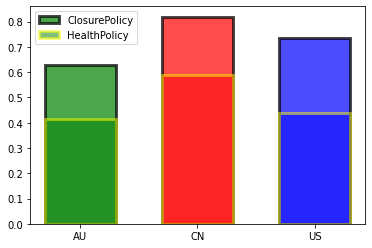

In [127]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='grb', edgecolor='black', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='grb', edgecolor='yellow', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

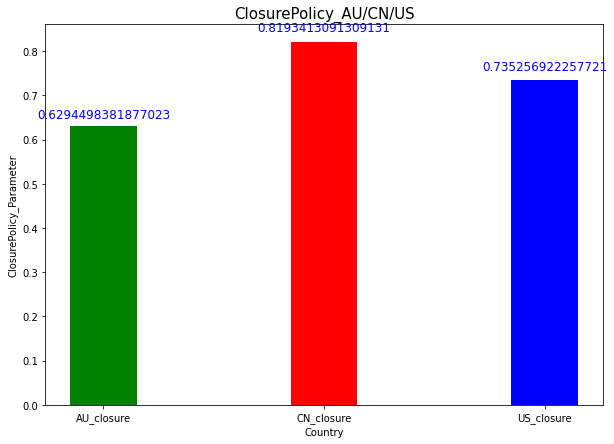

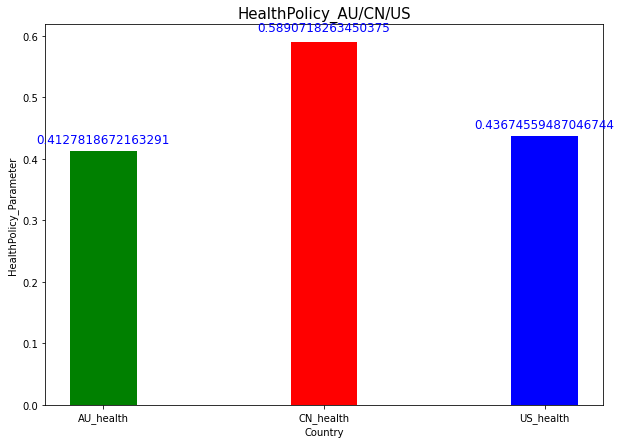

In [103]:
x = ["AU_closure", "CN_closure", "US_closure"]
y = [AU_closure_average, CN_closure_average, US_closure_average]
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=x, height=y, width=0.3, align="center", color="grb", linewidth=2.0)
ax.set_title("ClosurePolicy_AU/CN/US", fontsize=15)
plt.xlabel('Country')
plt.ylabel('ClosurePolicy_Parameter')
xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(s=s, xy=xy, fontsize=12, color="blue", ha="center", va="baseline" )
    
a = ["AU_health", "CN_health", "US_health"]
b = [AU_health_average, CN_health_average, US_health_average]
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=a, height=b, width=0.3, align="center", color="grb", linewidth=2.0)
ax.set_title("HealthPolicy_AU/CN/US", fontsize=15)
plt.xlabel('Country')
plt.ylabel('HealthPolicy_Parameter')
aticks = ax.get_xticks()
for i in range(len(b)):
    ab = (aticks[i], b[i] * 1.03)
    s = str(b[i])
    ax.annotate(s=s, xy=ab, fontsize=12, color="blue", ha="center", va="baseline" )
    
plt.show()